In [14]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.2/7.7 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 4.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 7.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.7 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.7 MB 9.5 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.7 MB 9.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.7 MB 10.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.0/7.7 MB 10.6 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/7.7 MB 10.8 MB/s eta 0:00:01
   --------

In [15]:
import os
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt



In [23]:
# 이탈자데이터 디렉토리 경로
directory = r'C:\Users\me\Downloads\이탈자데이터'

# 모든 엑셀 파일의 경로를 가져오기
file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.xlsx')]

# 엑셀 파일을 읽어들여 데이터프레임으로 변환하여 리스트에 저장
dfs = []
for file_path in file_paths:
    dfs.append(pd.read_excel(file_path, dtype=str))

# 리스트에 있는 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)


# '체류시간' 열의 데이터 유형이 숫자가 아닌 경우 숫자로 변환
merged_df['체류시간'] = pd.to_numeric(merged_df['체류시간'], errors='coerce')

# 체류시간을 10초 간격으로 나누어 새로운 열 추가
merged_df['10초_구간'] = (merged_df['체류시간'] // 10) * 10


In [24]:
merged_df

,아이디,체류시간,이탈유형,10초_구간
0,100483220.1712389528,0,out,0
1,1005868471.1712404613,0,out,0
2,1018016657.1712372202,36,out,30
3,1024324990.1691731557,0,out,0
4,1035441846.1712367047,22,in,20
...,...,...,...,...
1531,94424834.1710374458,0,out,0
1532,951484859.1712885154,0,out,0
1533,994206357.1712878044,0,out,0
1534,176536557.1713021815,0,out,0


In [75]:
statistics = merged_df.groupby(['10초_구간', '이탈유형']).size().unstack(fill_value=0)
# 각 구간별 'out'과 'in'의 합계를 계산하여 새로운 열 추가
statistics['total'] = statistics.sum(axis=1)

In [77]:
df_reset = statistics.rename_axis(None, axis=1)
df_reset.index.name = None
df_reset.to_excel("test.xlsx")

In [63]:
df_subset = statistics[['10초_구간', 'in', 'out', 'total']].copy()
df_subset

이탈유형,10초_구간,in,out,total
0,0,16,1175,1191
1,10,17,36,53
2,20,13,34,47
3,30,9,30,39
4,40,6,29,35
5,50,0,23,23
6,60,3,21,24
7,70,2,11,13
8,80,4,12,16
9,90,1,8,9


In [61]:
df_subset = statistics[['10초_구간', 'in', 'out', 'total']].copy()
df_subset.set_index('10초_구간', inplace=False)


이탈유형,in,out,total
10초_구간,,,
0,16,1175,1191
10,17,36,53
20,13,34,47
30,9,30,39
40,6,29,35
50,0,23,23
60,3,21,24
70,2,11,13
80,4,12,16


In [62]:
df_subset

이탈유형,10초_구간,in,out,total
0,0,16,1175,1191
1,10,17,36,53
2,20,13,34,47
3,30,9,30,39
4,40,6,29,35
5,50,0,23,23
6,60,3,21,24
7,70,2,11,13
8,80,4,12,16
9,90,1,8,9


Text(0.5, 0, '10-second intervals')

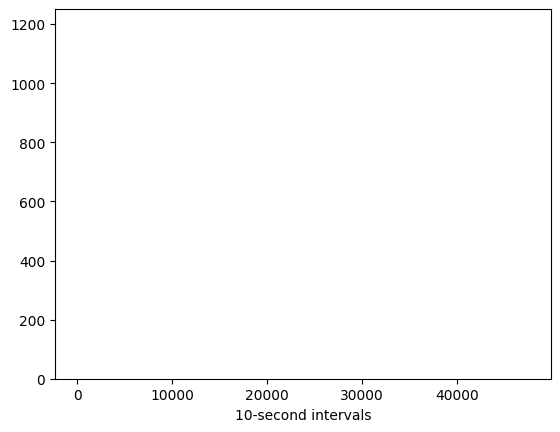

In [38]:
plt.bar(statistics.index, statistics['in'], color='blue', label='in')
plt.bar(statistics.index, statistics['out'], bottom=statistics['in'], color='orange', label='out')
plt.xlabel('10-second intervals')


In [ ]:
# 합쳐진 데이터프레임을 엑셀 파일로 저장
merged_df.to_excel('merged_data.xlsx', index=False)

print("모든 엑셀 파일을 합쳐서 merged_data.xlsx로 저장되었습니다.")
